**About Titanic**
=================

RMS Titanic, during her maiden voyage on April 15, 1912, sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. The tragedy is considered one of the most infamous shipwrecks in history and led to better safety guidelines for ships.

**I have approached this project through the following process:**

 1. Understand different features in the training dataset
 2. Clean the features
 3. Remove outliers
 4. Find relation between different features and survival
 5. Find the best features using SelectKBest (to get an optimal fit between bias and variance)
 6. Train and fit the model
 7. Predict the scores using KNearestNeighbors
 8. Check Accuracy
 9. Predict Survival values for test.csv
 10. Create final file for submission



In [ ]:
# Importing related Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

# Importing SKLearn clssifiers and libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the training dataset

df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#  1. Understand different features in the training dataset

The training dataset, imported as a Pandas dataframe (train_df) has 891 rows with 12 columns/features, with some of the details mentioned below:

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 2. Clean the features

I am not interested the following features, as I believe they do not hold any logical reason, why the passenger will survive or not :

 1. Name
 2. Ticket
 3. Fare
 4. Cabin

Further, in case I find correlation between them, I believe it will not be causation (Ticket, Fare, and Cabin can be highly correlated to Passenger Class)

Therefore, I have dropped the above-mentioned features from the training dataset


In [ ]:
df_train = df_train.drop('Name', axis=1,)
df_train = df_train.drop('Ticket', axis=1,)
df_train = df_train.drop('Fare', axis=1,)
df_train = df_train.drop('Cabin', axis=1,)

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

I have created another column/feature for number of people in the family (Family) by adding SibSp, Parch, and 1 (for the passenger).

Further, I have dropped the SibSp and Parch features



In [ ]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1

In [ ]:
df_train = df_train.drop('SibSp', axis=1,)
df_train = df_train.drop('Parch', axis=1,)

I also want to check a hypothesis that while saving passengers minors were given preference over adults.

Therefore, I would be creating a new column to differentiate minors from adults. However, I will first check the Age statistics of passengers.

In [ ]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Since the column Age contains several NaN values, I will first clear those values in next section, and then create the new column.

#  3. Remove outliers

Now, I want to check which features have how many NaN cells

In [ ]:
feat_list = list(df_train.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(df_train[feat])))

PassengerId :  0
Survived :  0
Pclass :  0
Sex :  0
Age :  177
Embarked :  2
Family :  0


We have 177 NaN in Age and 2 in Embarked.

 1. For Age, I have filled the NaN with median age
 2. For Embarked, I have filled the NaN with port of embarkation with maximum frequency

In [ ]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())

In [ ]:
df_train["Embarked"].mode()

0    S
dtype: object

In [ ]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

In [ ]:
# re-checking NaNs

feat_list = list(df_train.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(df_train[feat])))

PassengerId :  0
Survived :  0
Pclass :  0
Sex :  0
Age :  0
Embarked :  0
Family :  0


In [ ]:
# Checking statistics of Age column
df_train["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

As discussed before, I have now categorized the Age feature into following two categories:

 1. Passengers who were minors (0)
 2. passengers who were adults (1)

I have created a new column named Adult, and assigned value 1 to passengers who were 18 years and above, and 0 to passengers who were minors.

This is done to check the hypothesis that more minors survived, as compared to adults

In [ ]:
df_train["Adult"] = 0

In [ ]:
df_train["Adult"][df_train["Age"] >= 18] = 1

<ipython-input-19-845fd0f8fcb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Adult"][df_train["Age"] >= 18] = 1


In [ ]:
# performing a sanitory check to confirm

### Number of passengers with age >= 18 - Age column
print ("Passengers more than 18 yrs old: ",str(len(df_train[df_train["Age"] >= 18])))

### Number of adult passengers  - Adult column

print ("Number of Adults: ",str(len(df_train[df_train["Adult"] >= 1])))

Passengers more than 18 yrs old:  778
Number of Adults:  778


In [ ]:
### Dropping the Age column

df_train = df_train.drop('Age', axis=1,)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Adult
0,1,0,3,male,S,2,1
1,2,1,1,female,C,2,1
2,3,1,3,female,S,1,1
3,4,1,1,female,S,2,1
4,5,0,3,male,S,1,1


#  4. Find relation among different features and survival

In order to find relation between any two features, I have used Pivot Tables. I have used a function to save myself from code redundancy.

In [ ]:
### I have created a function, which given two parameters,
### creates a pivot table and a bar chart to show their relationship

def make_pivot (param1, param2):
    df_slice = df_train[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)

    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))

    return slice_pivot
    return p_chart




**Relation between Survival and Passenger Class**

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

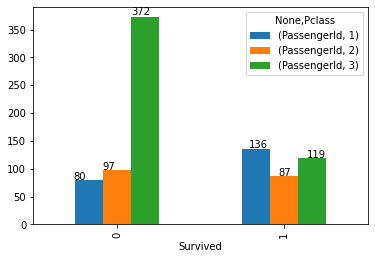

In [ ]:
make_pivot("Survived","Pclass")

**Relation between Survival and Passenger Sex**

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

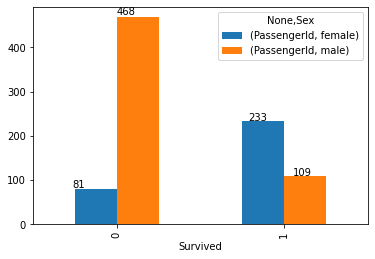

In [ ]:
make_pivot("Survived","Sex")

**Relation between Survival and Port of Embarkation**

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

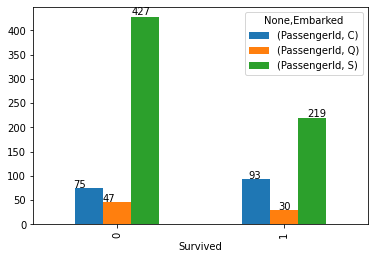

In [ ]:
make_pivot("Survived","Embarked")

**Relation between Survival and Family Members On-board**

PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

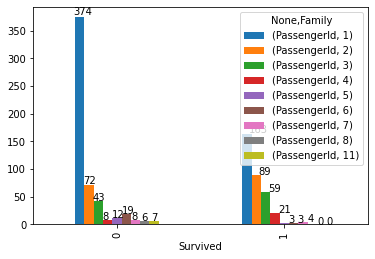

In [ ]:
make_pivot("Survived","Family")

**Relation between Survival and Passenger Age (Adult Status)**


PassengerId     
Adult              0    1
Survived                 
0                 52  497
1                 61  281

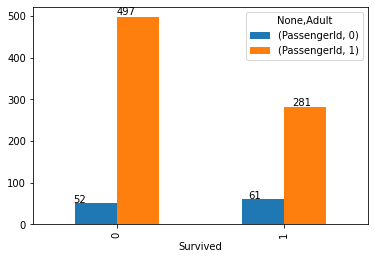

In [ ]:
make_pivot("Survived","Adult")

*It does not prove my hypothesis that minors were given preference over adults while saving passengers*

#  5. Find the best features using SelectKBest (to get an optimal fit between bias and variance)

From the df_train dataframe, I have created a dataframe X, which contains all the features, and a numpy array y, which contains values of survived passengers

In [ ]:
df1 = df_train.filter(['Pclass','Sex','Embarked','Family','Adult'], axis=1)

X = df1

In [ ]:
df2 = df_train['Survived']

y = df2

in order to run SelectKBest, I have converted values in "Embarked"  and "Sex" to floats

In [ ]:
X["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
X["Embarked"][df_train["Embarked"] == "S"] = 1
X["Embarked"][df_train["Embarked"] == "C"] = 2
X["Embarked"][df_train["Embarked"] == "Q"] = 3

<ipython-input-28-c2939fff091e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "S"] = 1
<ipython-input-28-c2939fff091e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "C"] = 2
<ipython-input-28-c2939fff091e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "Q"] = 3


In [ ]:
X["Sex"][df_train["Sex"] == "male"] = 1
X["Sex"][df_train["Sex"] == "female"] = 2


<ipython-input-29-7b5a1b0d2fdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][df_train["Sex"] == "male"] = 1
<ipython-input-29-7b5a1b0d2fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][df_train["Sex"] == "female"] = 2


In [ ]:
# using SelectKBest to get scores of all features of the DataFrame

test = SelectKBest(f_classif, k='all')
test_fit = test.fit(X, y)
feat_score = test_fit.scores_.round(3)
p_values = -np.log10(test_fit.pvalues_).round(3)

In [ ]:
feature_list = list(X.columns.values)
selected_features = test.get_support([test_fit])
selected_features

array([0, 1, 2, 3, 4])

In [ ]:
temp_list = [ ]

for i in selected_features:
    temp_list.append({'Feature':feature_list[i], 'P_Value':p_values[i], 'Score': feat_score[i]  })

feat_select = pd.DataFrame(temp_list)

In [ ]:
feat_select = feat_select.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [ ]:
feat_select = feat_select.set_index('Feature')

In [ ]:
feat_select

,P_Value,Score
Feature,,
Sex,68.852,372.406
Pclass,24.596,115.031
Adult,3.594,13.485
Embarked,2.851,10.259
Family,0.208,0.246


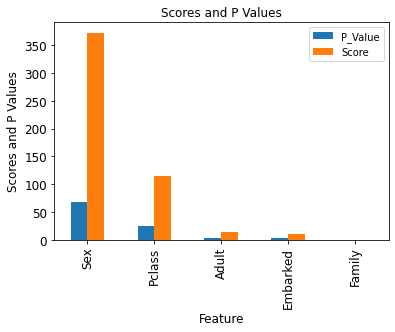

In [ ]:
ax = feat_select[['P_Value','Score']].plot(kind='bar', title ="Scores and P Values",  legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Scores and P Values", fontsize=12)
plt.show()

**Based on the score above, I have considered top-3 features - Sex, Pclass and Adult - as my final features**

In [ ]:
### Dropping the Embarked and Family column

X = X.drop('Embarked', axis=1,)
X = X.drop('Family', axis=1,)


In [ ]:
X.head()

,Pclass,Sex,Adult
0,3,1,1
1,1,2,1
2,3,2,1
3,1,2,1
4,3,1,1


#  6. Train and fit the model

Since the test.csv does not have "Survived" column, I have split the training dataset to do in-house accuracy and precision testing, before submitting the entry

In [ ]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
features_train.shape

(623, 3)

In [ ]:
features_test.shape

(268, 3)

In [ ]:
labels_train.shape

(623,)

In [ ]:
labels_test.shape

(268,)

# 7. Predict the scores using KNearestNeighbors

**Using K Nearest Neighbors (KNN) with GridSearchCV**

In [ ]:
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(features_train, labels_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [ ]:
grid.grid_scores_

AttributeError: ignored

In [ ]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.8998137973137974


In [ ]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(n_neighbors=8, weights='distance')


#  8. Check Accuracy

In [ ]:
# predicting scores

label_pred = grid.predict(features_test)

In [ ]:
# Calculating Accuracy

acc_clf = metrics.accuracy_score(labels_test,label_pred)
print ("classifier's accuracy: ",str(acc_clf) )

classifier's accuracy:  0.7910447761194029


In [ ]:
# Calculating precision, recall, and fbeta_score
scr_clf = precision_recall_fscore_support(labels_test,label_pred, average='weighted')

print ("classifier's precision: ",str(scr_clf[0]))
print ("classifier's recall: ",str(scr_clf[1]))
print ("classifier's fbeta_score: ",str(scr_clf[2]))

classifier's precision:  0.8077389658661381
classifier's recall:  0.7910447761194029
classifier's fbeta_score:  0.7807467111084891


# 9. Predict Survival values for test.csv

Now that I have checked the accuracy, precision and recall, I will predict the scores test.csv and export the final file for submission.

In [ ]:
# Importing the testing dataset

df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I need only the following three features from the dataframe:

 1. Sex
 2. Pclass
 3. Adult (derived from Age)

In [ ]:
test_set = df_test[['Pclass', 'Sex', 'Age']].copy()

In [ ]:
test_set.columns.values

array(['Pclass', 'Sex', 'Age'], dtype=object)

In [ ]:
# checking NaNs

test_list = list(test_set.columns.values)

for test_item in test_list:
    print (test_item,": ",sum(pd.isnull(test_set[test_item])))


Pclass :  0
Sex :  0
Age :  86


In [ ]:
# Filling NaN values in Age

test_set["Age"] = test_set["Age"].fillna(test_set["Age"].median())

In [ ]:
# Creating the "Adult" column

test_set["Adult"] = 0
test_set["Adult"][test_set["Age"] >= 18] = 1

### Dropping the Age column

test_set = test_set.drop('Age', axis=1,)

<ipython-input-56-ec407f9e4b60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Adult"][test_set["Age"] >= 18] = 1


In [ ]:
# Converting values of column "Sex" to float


test_set["Sex"][test_set["Sex"] == "male"] = 1
test_set["Sex"][test_set["Sex"] == "female"] = 2

<ipython-input-57-a2f8088a9dfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Sex"][test_set["Sex"] == "male"] = 1
<ipython-input-57-a2f8088a9dfd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Sex"][test_set["Sex"] == "female"] = 2


In [ ]:
test_set.head()

,Pclass,Sex,Adult
0,3,1,1
1,3,2,1
2,2,1,1
3,3,1,1
4,3,2,1


In [ ]:
# predicting survivals on test set

final_pred = grid.predict(test_set)
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
len(final_pred)

418

# 10. Create final file for submission

In [ ]:
df_test['Survived'] = pd.Series(final_pred, index=df_test.index)

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [ ]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)

In [ ]:
final_df.shape

(418, 2)

In [ ]:
# Exporting predictions as csv
final_df.to_csv("titanic_pred.csv", encoding='utf-8')